[*********************100%***********************]  7 of 7 completed


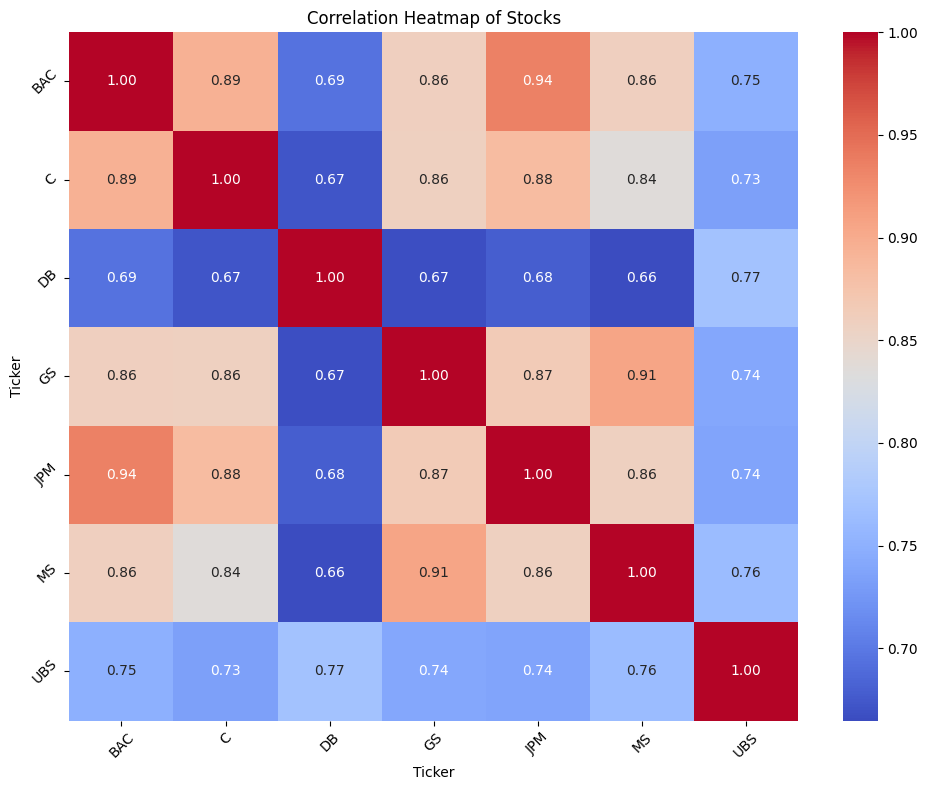

<Figure size 1200x600 with 0 Axes>

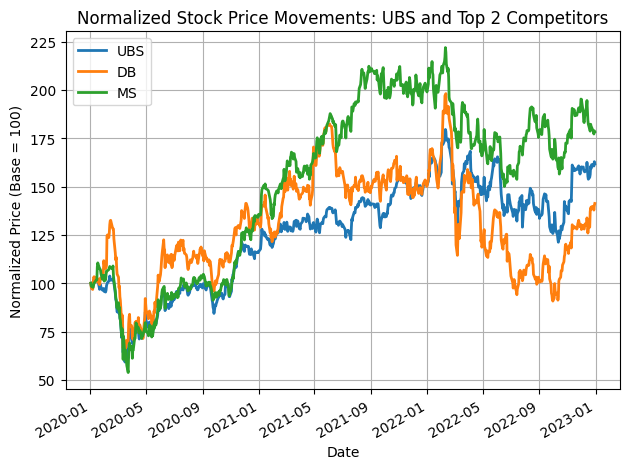

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Download Data
tickers = ['UBS', 'DB', 'GS', 'MS', 'JPM', 'C', 'BAC']
data = yf.download(tickers, start="2020-01-01", end="2023-01-01")['Adj Close']

# Step 2: Calculate Daily Returns
returns = data.pct_change().dropna()

# Step 3: Compute Correlations
correlation_matrix = returns.corr()
ubs_correlations = correlation_matrix['UBS']

# Step 4: Identify Top 2 Correlated Competitors
top_2 = ubs_correlations.sort_values(ascending=False)[1:3]  # Exclude UBS itself
top_2_stocks = top_2.index.tolist()

# Step 5: Plot Heatmap of Correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap of Stocks")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 6: Normalize Prices
normalized_data = data / data.iloc[0] * 100  # Scale prices to start at 100

# Step 7: Plot Normalized Prices for UBS and Top 2 Correlated Stocks
plt.figure(figsize=(12, 6))
normalized_data[['UBS'] + top_2_stocks].plot(title="Normalized Stock Price Movements: UBS and Top 2 Competitors", linewidth=2)
plt.ylabel("Normalized Price (Base = 100)")
plt.xlabel("Date")
plt.legend(['UBS'] + top_2_stocks)
plt.grid()
plt.tight_layout()
plt.show()
